In the Week 4 Exercise, you will build a linear regression model to predict fuel efficiency (miles per gallon) of automobiles. 

#### 1. Download the auto-mpg.csv dataset from: Auto-mpg dataset. Load the data as a Pandas data frame and ensure that it imported correctly.

In [1]:
import pandas as pd
import numpy as np

In [23]:
auto_mpg_df  = pd.read_csv('auto-mpg.csv') 
auto_mpg_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### 2. Begin by prepping the data for modeling:

    i. Remove the car name column.

In [24]:
auto_mpg_df_v2 = auto_mpg_df.drop( columns='car name') 
auto_mpg_df_v2.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


    ii. The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean. 

In [25]:
auto_mpg_df_v2.dtypes # Identifying datatypes. horsepower is in an object. 

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [26]:
auto_mpg_df_v2.horsepower.unique() # Getting unique values to find incorrect values

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

 Horsepower has a '?' which is not an int/float. Replacing '?' with the mean of horsepower

In [27]:
auto_mpg_df_v2['horsepower'] = auto_mpg_df_v2['horsepower'].replace('?', np.mean(pd.to_numeric(auto_mpg_df_v2['horsepower'], errors='coerce')))
auto_mpg_df_v2['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 104.46938775510205, '100', '105', '175',
       '153', '180', '110', '72', '86', '70', '76', '65', '69', '60',
       '80', '54', '208', '155', '112', '92', '145', '137', '158', '167',
       '94', '107', '230', '49', '75', '91', '122', '67', '83', '78',
       '52', '61', '93', '148', '129', '96', '71', '98', '115', '53',
       '81', '79', '120', '152', '102', '108', '68', '58', '149', '89',
       '63', '48', '66', '139', '103', '125', '133', '138', '135', '142',
       '77', '62', '132', '84', '64', '74', '116', '82'], dtype=object)

    iii. Create dummy variables for the origin column.

In [28]:
auto_mpg_dummy_df = pd.get_dummies(auto_mpg_df, columns=['origin'])
auto_mpg_dummy_df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0


#### 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [35]:
auto_mpg_df_v2.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


weight and displacement have a high negative correlation with mpg.

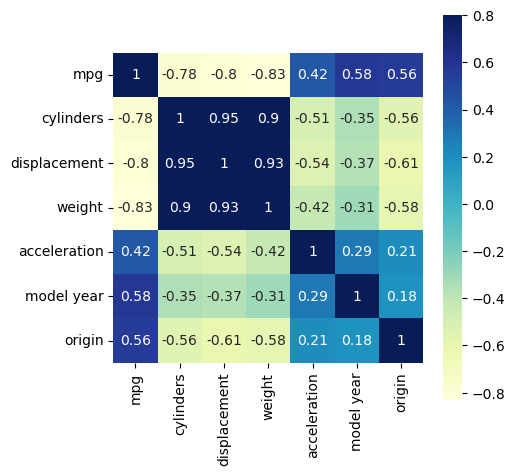

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = auto_mpg_df_v2.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,cmap='YlGnBu');
plt.show()

#sn.heatmap(corrMatrix, annot=True)
#plt.show(

#### 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

Text(0.5, 1.0, 'mpg vs weight')

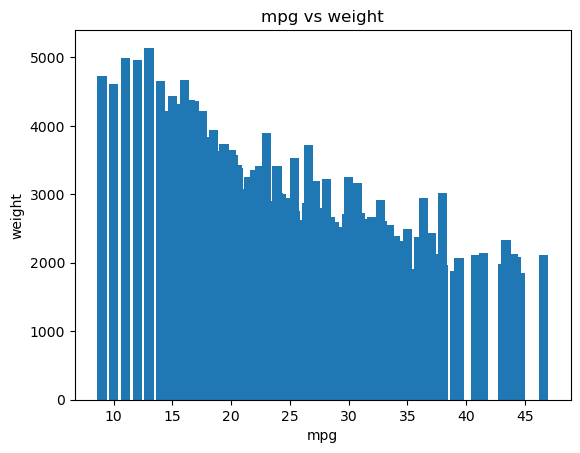

In [37]:
plt.bar(auto_mpg_df_v2.mpg,auto_mpg_df_v2.weight) 
plt.xlabel("mpg")
plt.ylabel("weight")
plt.title("mpg vs weight")

From the chart, it is evident that as mpg and weight are negatively correlated. As the weight goes up, mpg decreases.

#### 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [71]:
# Import library
from sklearn.model_selection import train_test_split

# Create training and test sets 
y = auto_mpg_df_v2.mpg
x = auto_mpg_df_v2.drop('mpg',axis=1) 

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
print("Original dataset :", auto_mpg_df_v2.shape) 
print("X train : ", x_train.shape[0])
print("Y train : ", y_train.shape[0])
print("X test : ", x_test.shape[0])
print("Y test : ", y_test.shape[0])

Original dataset : (398, 8)
X train :  318
Y train :  318
X test :  80
Y test :  80


#### 6. Train an ordinary linear regression on the training data.

In [77]:
#Load required libraries
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(x_train,y_train)
print('Coeff : ',lr.coef_) 

Coeff :  [-0.34300193  0.01942318 -0.01686394 -0.00696096  0.12717167  0.78037201
  1.30845663]


In [62]:
predictions = lr.predict(x_test)
predictions

array([17.15833798, 20.55112867, 29.83362348, 28.94129021, 18.74043654,
       15.57920859, 10.88233212, 15.30416649, 20.7530766 , 12.19459822,
       19.49923107, 22.51873759, 33.58659401, 29.59154482, 29.98612272,
       19.70675915, 22.05631313, 17.86127535, 13.11055628, 17.33392201,
       22.42987447, 18.39197478, 23.23707597, 30.5670774 , 28.59845855,
       27.2199283 , 24.25178387, 10.36009619, 35.49597197, 28.19560173,
       12.67887322,  8.57524212, 17.9821634 , 20.82756098, 23.15208288,
        7.10140425, 20.90089021, 26.14035753, 32.36000068, 34.47336209,
       21.19254092, 18.64901556, 16.8295314 , 25.38675495, 22.65235264,
       25.91905774, 31.31343344, 10.63355014, 32.15549888, 12.85086135,
       34.20895786, 34.90985895, 31.18652408, 25.31742936, 28.74482854,
       11.49104236, 17.4591845 , 26.06361162,  9.8824107 , 24.69678519,
       23.31753656, 17.29446946, 12.08384313, 30.30844803, 28.48333672,
       31.08796216, 30.78212042, 10.29973106, 15.42631592, 27.59

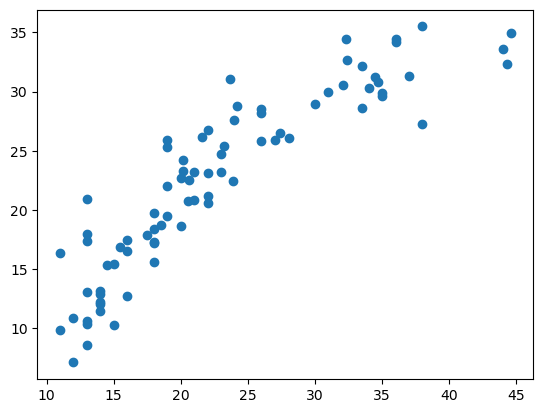

In [63]:
plt.scatter(y_test, predictions)
plt.show()

#### 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [78]:
import sklearn.metrics as metrics

print('Score : ',lr.score(x_train,y_train)) 
# R^2
print('R^2 : ', metrics.r2_score(y_test, predictions))
#RMSE
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

#MAE
print('MAE : ',metrics.mean_absolute_error(y_test, predictions))

Score :  0.8150399002132145
R^2 :  -0.8420564032429856
RMSE :  10.393328150906763
MAE :  8.36415376259967


#### 8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

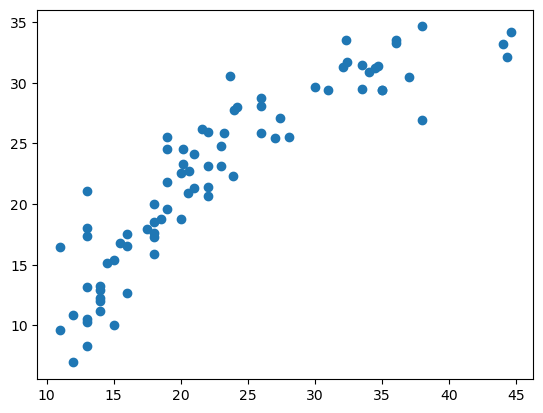

In [68]:
from sklearn.linear_model import Lasso

# Creating Lasso Regression model

lasso_reg = Lasso(alpha=0.3)
lasso_reg.fit(x_train,y_train)
predict = lasso_reg.predict(x_test)
plt.scatter(y_test, predict)
plt.show()

In [76]:
#Regression Score
print('Score : ',lasso_reg.score(x_test,y_test))

# Lasso Regression  R2, RMSE, and MAE on training and test sets
# R^2
print('R^2 : ', metrics.r2_score(y_test, predict))
#RMSE
print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test, predict)))

#MAE
print('MAE : ',metrics.mean_absolute_error(y_test, predict))


Score :  0.8382292477165283
R^2 :  -0.8021888931770234
RMSE :  10.280241852523538
MAE :  8.301966884872297
